In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_predict,RandomizedSearchCV,train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from scipy.stats import randint
from scipy.ndimage import shift
import joblib

## Data prep

In [2]:
df=fetch_openml('mnist_784',as_frame=False)

In [120]:
def plot_image(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.show()

In [4]:
X,y=df.data,df.target

In [5]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

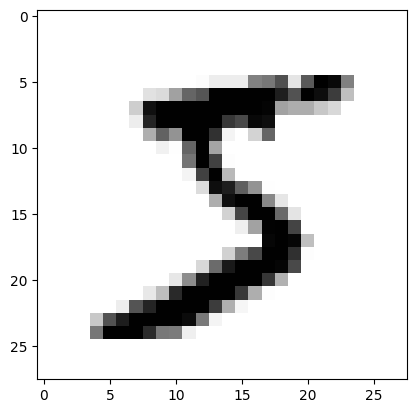

In [7]:
plot_image(X[0])

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Model - KNN

In [10]:
knn=KNeighborsClassifier()

In [11]:
strat=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
y_pred=cross_val_predict(knn,X,y,cv=strat,verbose=3 )
print(classification_report(y,y_pred))

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6903
           1       0.96      0.99      0.98      7877
           2       0.98      0.96      0.97      6990
           3       0.97      0.97      0.97      7141
           4       0.98      0.97      0.97      6824
           5       0.96      0.97      0.97      6313
           6       0.98      0.99      0.98      6876
           7       0.96      0.97      0.97      7293
           8       0.99      0.93      0.96      6825
           9       0.95      0.96      0.96      6958

    accuracy                           0.97     70000
   macro avg       0.97      0.97      0.97     70000
weighted avg       0.97      0.97      0.97     70000



In [246]:
sample_weight=(y_pred!=y)

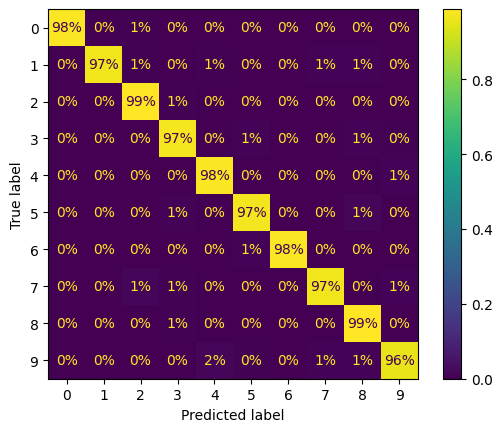

In [248]:
ConfusionMatrixDisplay.from_predictions(y_pred,y,normalize="true",values_format=".0%")

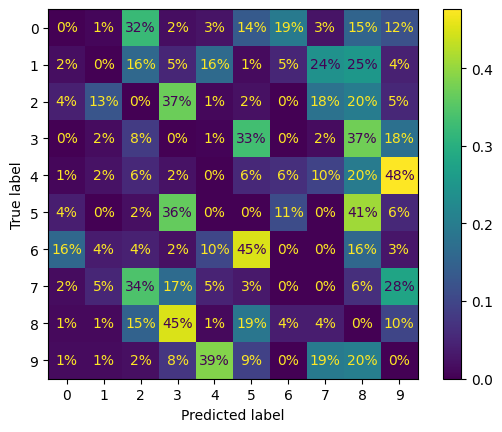

In [247]:
ConfusionMatrixDisplay.from_predictions(y_pred,y,normalize="true",values_format=".0%",sample_weight=sample_weight)

## Hyperparameter tuning

In [12]:
param_distrib={
    'n_neighbors':randint(low=3,high=20),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
random_search=RandomizedSearchCV(
    param_distributions=param_distrib,
    estimator=knn,
    cv=5,
    verbose=3,
    n_iter=150,
    n_jobs=4,
    random_state=42
)

In [13]:
#random_search.fit(X_test,y_test)

In [ ]:
#best_model=random_search.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [ ]:
#best_model

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [ ]:
#joblib.dump(best_model,'knn')

['knn']

In [15]:
best_model=joblib.load('knn')

In [16]:
best_model

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [17]:
y_pred=cross_val_predict(best_model,X,y,cv=strat,verbose=3 )
print(classification_report(y,y_pred))

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6903
           1       0.97      0.99      0.98      7877
           2       0.99      0.97      0.98      6990
           3       0.97      0.97      0.97      7141
           4       0.98      0.97      0.98      6824
           5       0.97      0.97      0.97      6313
           6       0.98      0.99      0.98      6876
           7       0.97      0.98      0.97      7293
           8       0.99      0.94      0.97      6825
           9       0.96      0.97      0.96      6958

    accuracy                           0.97     70000
   macro avg       0.97      0.97      0.97     70000
weighted avg       0.97      0.97      0.97     70000



## Data augmentation

In [210]:
X_train.shape

(56000, 784)

In [206]:
new_X=np.zeros(784,)
new_X

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [261]:
indices=np.where((y_train=='8')|(y_train=='5')|(y_train=='9')|(y_train=='3'))

In [264]:
indices

(array([    0,     2,     6, ..., 55988, 55989, 55992]),)

In [265]:
short_x=X_train[indices]
short_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [271]:
newer_X=np.zeros(784,)
newer_X

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [272]:
for x in range(0,10000):
    proxy=shift(short_x[x],shift=(2),cval=0)
    proxy=proxy.transpose()
    print(x)    
    newer_X=np.vstack((new_X,proxy))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186


KeyboardInterrupt: 

In [ ]:
new_X_train=X_train.join(new_X)

In [ ]:
new_X_train=new_X_train.join(newer_X)

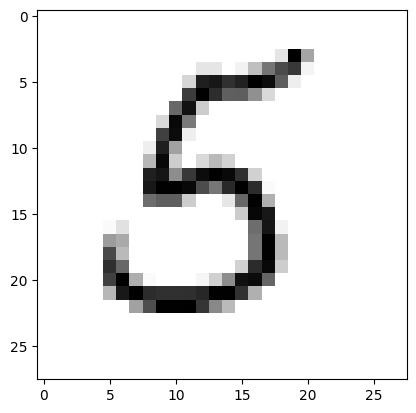

In [270]:
plot_image(new_X[1])

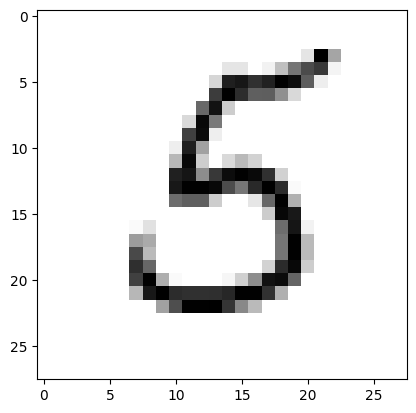

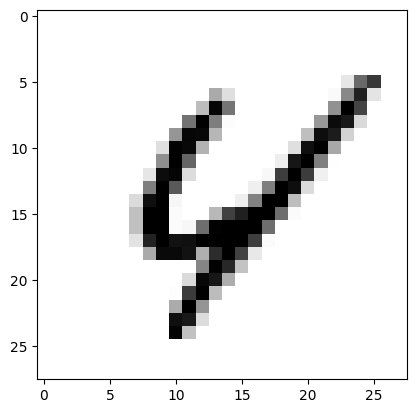

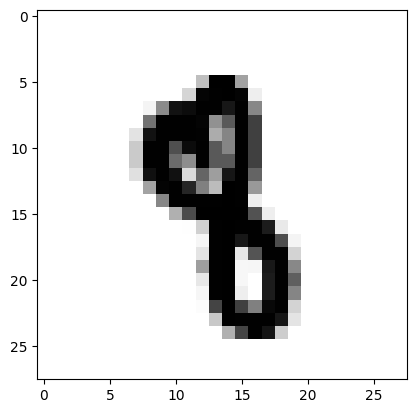

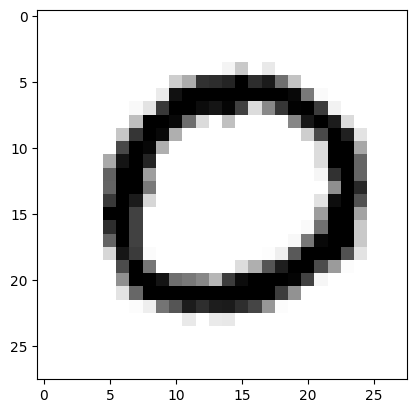

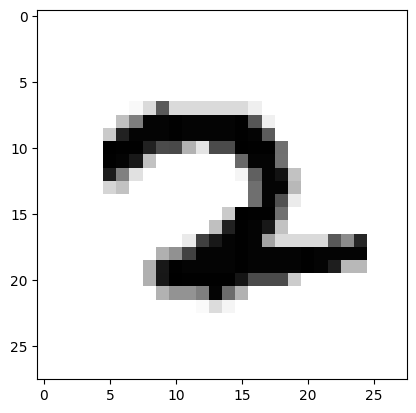

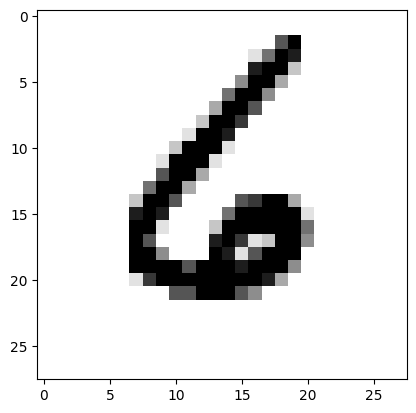

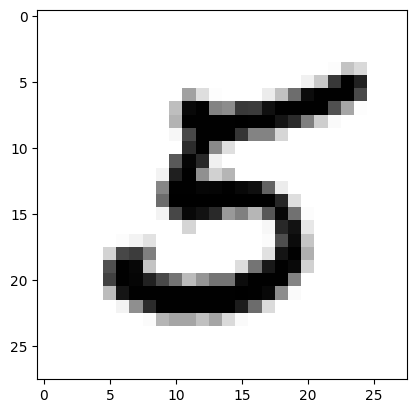

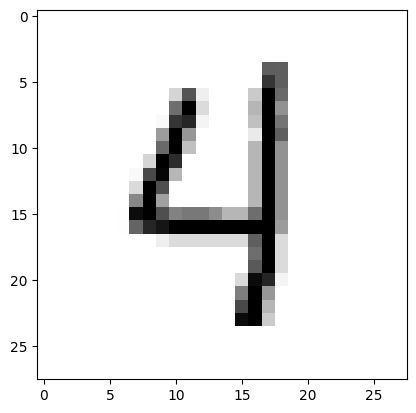

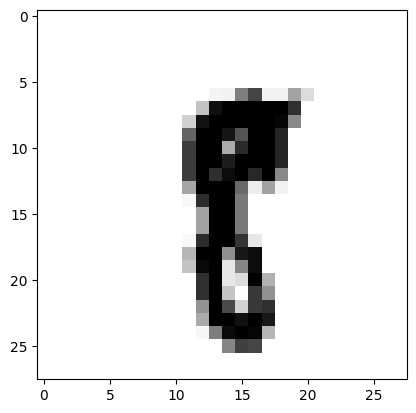

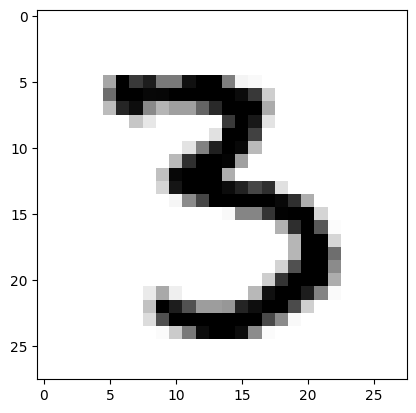

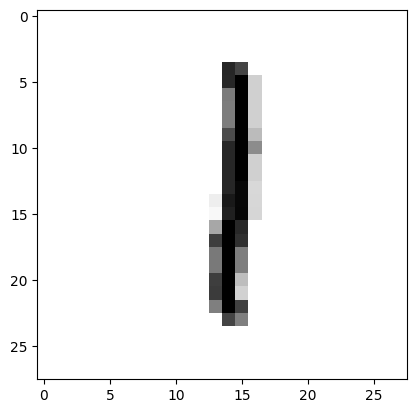

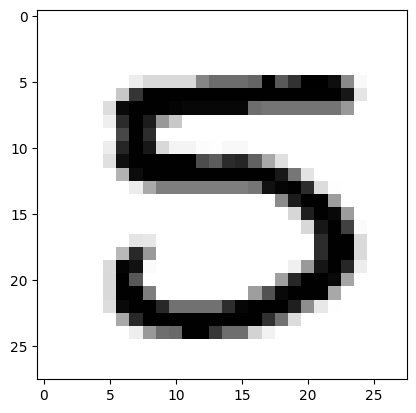

In [233]:
for i in range(0,12):
    plot_image(X_train[i])

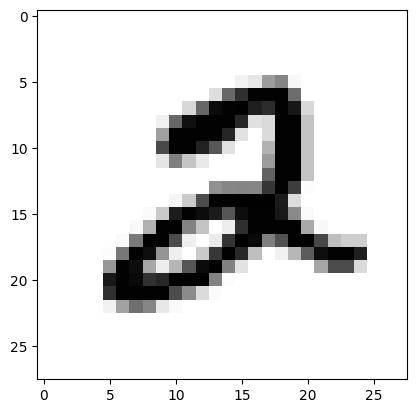

In [230]:
plot_image(X[5])